In [1]:
from mesa.visualization import (
    Slider,
    SolaraViz,
    make_plot_component,
    make_space_component,
)
import importlib
import numpy as np
from mesa.experimental import SolaraViz
from mesa.space import NetworkGrid

from scripts.agents.orders import Order
from scripts.agents.riders import Rider
from scripts import delivering
from animation.utils import agent_portrayal, Graph

In [2]:
np.random.seed(19)
num_riders = 2
max_t = 30
num_orders = 2

orders = [
    Order(
        id=i,
        creation_at=0,#(i+1)*1,
        restaurant_address=(3, 3),
        customer_address=(0, i*2),
    )
    for i in range(num_orders)
]

riders = [ 
    Rider(
        id=1, 
        shift_start_at=0, 
        shift_end_at=5,
        starting_point=(0,0)
        )
        for _ in range(num_riders)
        ]

model_params={
        "bag_limit": 2,
        "max_t": max_t,
        "dim": 10,
        "orders": orders,
        "riders":riders,
        "slowness": 1 # Slider(
    #     "Slowness", value=10, min=1, max=20, step=1
    # ),
    }


In [3]:
model= delivering.Dispatcher(**model_params)
for i in range(max_t):
    model.step()
df = model.datacollector.get_model_vars_dataframe()

/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,riders_before_shift,riders_free,riders_going_to_vendor,riders_going_to_customer,riders_unavailable,orders_delivered_cum,orders_delivered,orders_created,orders_waiting_cum,delivery_time_cum,delivery_time,queue_size,bag_size,orders_assigned,orders_picked_up
0,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,NaN,0,0
1,0,1,1,0,0,0,0,0,0,NaN,NaN,2.0,NaN,2,0
2,0,1,1,0,0,0,0,0,0,NaN,NaN,2.0,NaN,2,0
3,0,1,1,0,0,0,0,0,0,NaN,NaN,2.0,NaN,2,0
4,0,1,1,0,0,0,0,0,0,NaN,NaN,2.0,NaN,2,0
5,0,1,1,0,0,0,0,0,0,NaN,NaN,2.0,NaN,2,0
6,0,0,1,0,1,0,0,0,0,NaN,NaN,2.0,NaN,2,0
7,0,0,0,1,1,0,0,0,0,NaN,NaN,NaN,2.0,2,2
8,0,0,0,1,1,1,0,0,0,NaN,7.0,NaN,1.0,2,2
9,0,0,0,1,1,1,0,0,0,NaN,7.0,NaN,1.0,2,2


<Axes: >

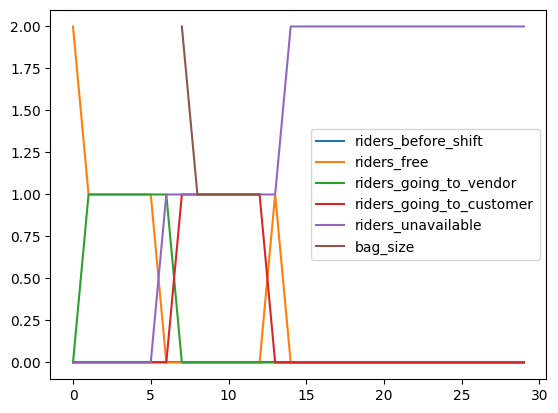

In [4]:
display(df)
df[[c for c in df.columns if "rider" in c or "bag" in c]].plot()

/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,riders_before_shift,riders_free,riders_going_to_vendor,riders_going_to_customer,riders_unavailable,orders_delivered_cum,orders_delivered,orders_created,orders_waiting_cum,delivery_time_cum,delivery_time,queue_size,bag_size,orders_assigned,orders_picked_up
0,0,10,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0
1,0,10,0,0,0,0,0,5,5,NaN,NaN,NaN,NaN,0,0
2,0,7,3,0,0,0,0,5,5,NaN,NaN,1.666667,NaN,5,0


<Axes: >

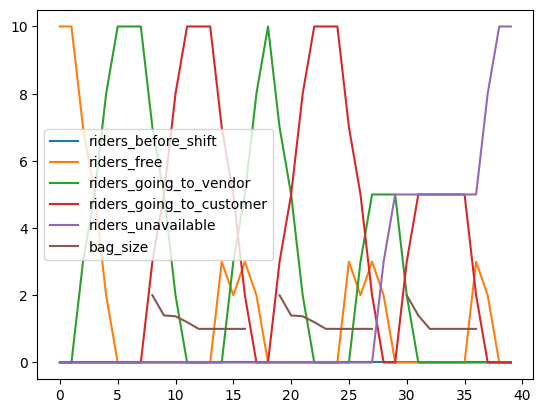

In [5]:
np.random.seed(19)
num_riders = 10
max_t = 40
num_orders = 50

orders = [
    Order(
        id=i,
        creation_at=(i//5+1)*1,
        restaurant_address=(3, 3),
        customer_address=(0, 2),
    )
    for i in range(num_orders)
]
riders = [ 
    Rider(
        id=1, 
        shift_start_at=0, 
        shift_end_at=5,
        starting_point=(0,0)
        )
        for _ in range(num_riders)
        ]

model_params={
        "bag_limit": 2,
        "max_t": max_t,
        "dim": 10,
        "orders": orders,
        "riders":riders,
        "slowness": 1 # Slider(
    #     "Slowness", value=10, min=1, max=20, step=1
    # ),
    }
model= delivering.Dispatcher(**model_params)
for i in range(max_t):
    model.step()
df = model.datacollector.get_model_vars_dataframe()
display(df[:3])
df[[c for c in df.columns if "rider" in c or "bag" in c]].plot()

<Axes: >

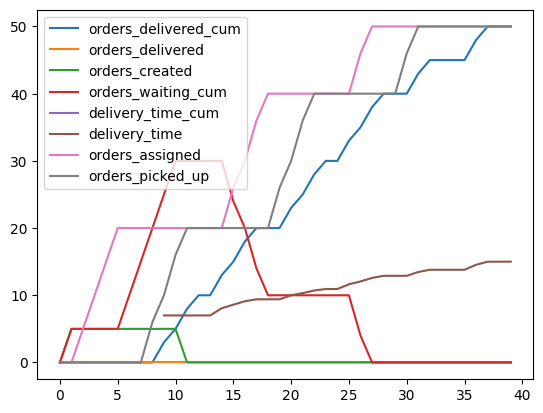

In [6]:
df[[c for c in df.columns if "orders" in c or "time" in c]].plot()

In [7]:
viz = SolaraViz(
    model_class=delivering.Dispatcher,
    #components=[Graph],
    model_params=model_params,
    name="Dispatcher",
    play_interval=10,
    agent_portrayal=agent_portrayal,
    measures=["delivery_time", "orders_assigned", "bag_size", "queue_size", "riders_free", "riders_going_to_vendor", "orders_picked_up", "orders_delivered"],
  
)

viz

Cannot show ipywidgets in text

Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!


/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,riders_before_shift,riders_free,riders_going_to_vendor,riders_going_to_customer,riders_unavailable,orders_delivered_cum,orders_delivered,orders_created,orders_waiting_cum,delivery_time_cum,delivery_time,queue_size,bag_size,orders_assigned,orders_picked_up
0,132,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0
1,132,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0
2,132,0,0,0,0,0,0,10,10,NaN,NaN,NaN,NaN,0,0


<Axes: >

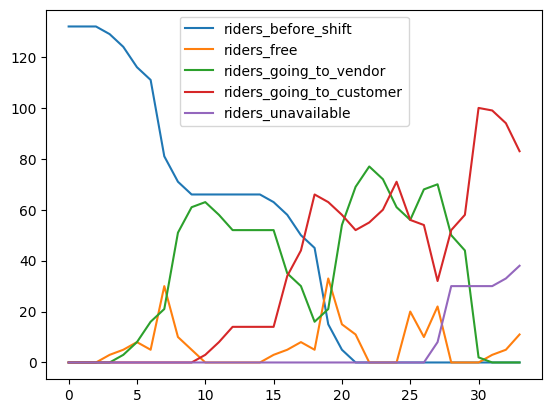

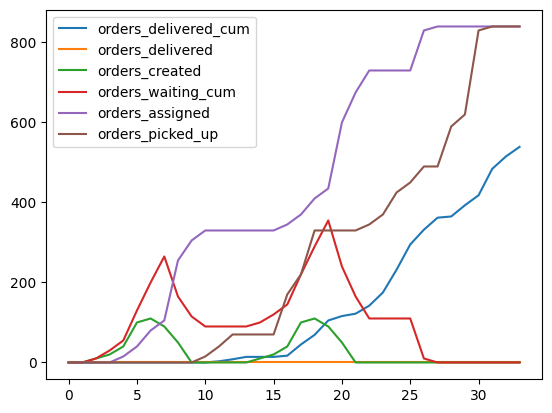

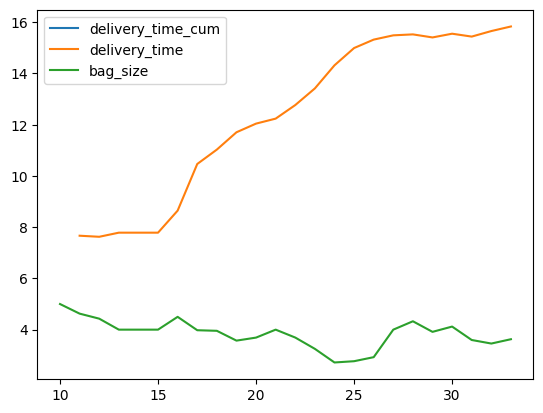

In [8]:
importlib.reload(delivering)

np.random.seed(19)

# TODO do a function to convert a list of quantities of orders into orders ->
# for each i, will create as many orders as are in the list[i]

_orders = [0, 0, 10, 20, 40, 100, 110, 90, 50, 0, 0, 0]*2
_riders = [0, 0, 0, 3, 5, 8, 5, 30, 10, 5, 0, 0]*2
max_t = len(_orders)



orders = [
    Order(
        id=sum(_orders[:t])+i,
        creation_at=t,
        restaurant_address=(3, 3),
        customer_address=(0, 2),
        preparation_time=q/10,
    )
    for t, q in enumerate(_orders) 
    for i in range(q)
]
riders = [ 
    Rider(
        id=i, 
        shift_start_at=t, 
        shift_end_at=min(t+10, max_t),
        starting_point=(0,0)
    )
    for t, q in enumerate(_riders) 
    for i in range(q)
        ]

model_params={
        "bag_limit": 5,
        "max_t": max_t,
        "dim": 10,
        "orders": orders,
        "riders":riders,
        "slowness": 1 # Slider(
    #     "Slowness", value=10, min=1, max=20, step=1
    # ),
    }
model= delivering.Dispatcher(**model_params)
for i in range(max_t+10):
    model.step()
df = model.datacollector.get_model_vars_dataframe()
display(df[:3])
df[[c for c in df.columns if "rider" in c  ]].plot()
df[[c for c in df.columns if "orders" in c ]].plot()
df[[c for c in df.columns if "time" in c or "bag" in c]].plot()


In [9]:
#[o.id for o in orders] == list(range(sum(_orders)))
